# Machine Learning Homework 2

## Instructions

**Completing the homework:**  Follow along with the text and code in the notebook from start to finish.  There are two parts and <span style="color:red">5</span> graded questions, worth a total of 5 points.  While some code is provided for you in the notebook, there are two types of work left for you:
- **Tasks:** This work is meant to help you better understand the course material an will help you answer the questions.  Importantly, this work is not graded.  It is optional, but highly recommended.
- **Questions:** These are the questions you need to answer and that are graded.
    
**How to turn in the homework**:  You need to make **two different Moodle submissions**.  First, you must open the Moodle Homework 2 Answers resources and answer the questions exactly how they correspond to those found in the Notebook.  Second, you must upload your notebook to the Moodle Homework 2 Notebook Upload.

This homework is due **before class on Monday, April 12.**

## Imports

Below are the some of the imports you will need to complete the homework.  You may use additional libraries if you desire.

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, confusion_matrix, accuracy_score, roc_auc_score, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
from sklearn import metrics 
from scipy.stats.stats import pearsonr  

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer
from matplotlib import pyplot as plt
%matplotlib inline
import warnings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings("ignore") 

C:\Users\User\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


# Feature Engineering, Decision Trees, and Principal Component Analysis

We will now work on a machine learning problem related to student educational outcomes.  The goal of Part 1 of this  homework assignment is to build a model that can accurately predict whether or not a student will pass their final year of high school.

The data we will use contains **student achievement in high school** for students enrolled in two Portuguese schools. The same dataset was used for homework 1, as well as the additional notebook on data visualization. The data features include **student grades, demographics, social and school-related features** and it was collected by using school reports and questionnaires [Cortez and Silva, 2008].  This data comes from a study carried about by Paulo Cortez at the University of Minho, located in Guimaraes, Portugal.  More information on the data and the problem can be found here:   https://www.kaggle.com/dipam7/student-grade-prediction.

The **business context** of this problem is building a machine learning model that can accurately predict if a student will fail their final year of secondary education, so that they may be enrolled pre-emptively into remedial courses.

## Feature Engineering

Once EDA is complete, the dataset would have to be transformed in such a way that models can be trained and fitted to the data.  For example, categorical variables should be converted to numerical. We used one hot enconding to encode some categorical variables.  One-hot encoding involves turning categorical variables into numerical binary indicators.

Much of the feature engineering for the Portuguese Student data has been done for you, and saved the transformed matrix in the file "X.csv".  The label has also been saved in a seperate file called "y.csv".  We will now load those files:

In [1]:
X = pd.read_csv("matrices/X.csv",index_col=0)
y = pd.read_csv("matrices/y.csv",index_col=0,squeeze = True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
X.head()

,absences,failures,grade1,traveltime,studytime,famrel,freetime,goout,Dalc,Walc,...,teacher_mjob,health_fjob,other_fjob,services_fjob,teacher_fjob,home_reason,other_reason,reputation_reason,mother_guardian,other_guardian
0,12,0,15,1,1,3,2,1,1,4,...,0,0,1,0,0,0,0,0,0,0
1,2,0,17,1,2,5,3,4,1,3,...,0,0,1,0,0,0,0,0,1,0
2,0,2,9,2,1,4,4,5,3,5,...,0,0,0,1,0,0,0,0,1,0
3,4,0,14,2,2,4,4,3,1,1,...,0,0,0,1,0,1,0,0,0,0
4,2,0,12,2,1,4,3,2,1,4,...,0,0,1,0,0,1,0,0,1,0


We are now going to read in a new variable and add it to our dataset.

In [3]:
new_var = pd.read_csv('matrices/var.csv')

<IPython.core.display.Javascript object>

**Task:**  Inspect the new variable stored in `new_var`.  What are the unique values it contains?  What are the counts of each value?  Are there any missing values?

In [5]:
# check for unique values
new_var["mentalhealth"].value_counts()

Never attended therapy               363
Have attended therapy in the past    355
Currently attending therapy          326
Name: mentalhealth, dtype: int64

In [6]:
# check for missing values
new_var["mentalhealth"].isnull().sum()

0

Since the new variable contains values that are strings, we need to convert it to something more easily processed by our machine learning model.  For this variable, we will use *one-hot encoding* feature engineering strategy. Since we could rank the values that this variable can take, we could also try ordinal encoding. However for this exercise, we will use one hot encoding.

**Task:** One-hot encode the variable and attach it to our matrix X.  Note that when one-hot encoding, you may choose to omit one value to avoid colinearity issues in the newly created one-hot encoded variables.  Since we will be using decision trees later on, and not linear regression, we will not omit the last value.

There are different ways to do one-hot encoding.  For example, as one approach you could use the Pandas functionf or creating dummy variables (https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html).  The Lecture 6 notebook has an alternative approach.

In [9]:
one_hot_encoded = pd.get_dummies(new_var.mentalhealth, prefix='mentalhealth')
one_hot_encoded.columns = ['attending_therapy', 'have_attended_therapy_past', 'never_attended_therapy']

**Question 1 (1 pt):** What is the correlation between the one-hot encoded variable for never attending therapy in the past and weekly alcoholic drinks?

Note that weekly alcoholic drinks is stored in the `Walc` variable.

> a) `0.025`\
> b) `0.047`\
> c) `-0.047`\
> d) `-0.025`

In [10]:
# correct answer: b)
walc_var = X['Walc'].values
one_hot_encoded_var = one_hot_encoded['never_attended_therapy'].values
pearsonr(walc_var, one_hot_encoded_var)[0]

0.04655623845728115

**Task:** Interpret this correlation.  What does it mean in plain-English?  What does the sign of the correlation indiciate (positive or negative)?

## Decision Trees

We are now going to work with Decision Tree models.

First, we will reload our `X` matrix.  We will not be using the new variable for mental health in this analysis.

In [11]:
X = pd.read_csv("matrices/X.csv",index_col=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

Now we will divide the data into training and testing data using the sklearn `train_test_split` function.

**Task:**  Train a Decision Tree Classifier with the following hyperparameters: `max_depth=2`, `splitter='best'`,`random_state=42`.  The following reference material may help you:  https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html.  Remember to fit the model using `X_train` and `y_train`.

**IMPORTANT:** Ensure that `random_state=42` or you will not get the correct answers later in the notebook.

In [12]:
clf = DecisionTreeClassifier(max_depth=2, splitter = 'best', random_state = 42)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

**Task:** What is the `accuracy_score` of this classifier?

Remember to evaluate the performance using `X_test` and `y_test`.

In [13]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8947368421052632


One of the advantages of a Decision Tree Classifier is that the model can easily be visualized.

**Task:** Generate an image of the Decision Tree Classifier showing all its nodes and splits.  You can do this using the `plot_tree` function from sklearn's `tree` component:  https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html.

[Text(167.4, 181.2, 'X[2] <= 8.5\ngini = 0.335\nsamples = 626\nvalue = [493, 133]\nclass = pass'),
 Text(83.7, 108.72, 'X[25] <= 0.5\ngini = 0.401\nsamples = 126\nvalue = [35, 91]\nclass = fail'),
 Text(41.85, 36.23999999999998, 'gini = 0.223\nsamples = 47\nvalue = [6, 41]\nclass = fail'),
 Text(125.55000000000001, 36.23999999999998, 'gini = 0.465\nsamples = 79\nvalue = [29, 50]\nclass = fail'),
 Text(251.10000000000002, 108.72, 'X[2] <= 10.5\ngini = 0.154\nsamples = 500\nvalue = [458, 42]\nclass = pass'),
 Text(209.25, 36.23999999999998, 'gini = 0.383\nsamples = 147\nvalue = [109, 38]\nclass = pass'),
 Text(292.95, 36.23999999999998, 'gini = 0.022\nsamples = 353\nvalue = [349, 4]\nclass = pass')]

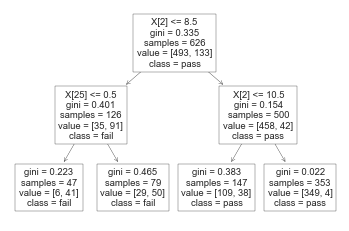

In [17]:
tree.plot_tree(clf, class_names=["pass", "fail"])

**Question 2 (1 pt):** Which of the following rules is found in the node at the top of the Decision Tree Classifier?

> a) `other_fjob <= 0.5` \
> b) `grade1 <= 10.5` \
> c) `grade1 <= 8.5` \
> d) `failures <= 2.0`

In [ ]:
# c) grade1 <= 8.50

**Task:** Train another classifer or two.  For example, you could train a Logistic Regression model (https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) or perhaps a more complex model like a Random Forest Classifier  which will be covered in Lecture 7. (https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html).

What is the `accuracy_score` of these classfier?

**Task:** Compare the `accuracy_score` between the Decision Tree Classifier and the new classifier(s) you have trained.  How does the performance differ?

Now take a moment to reflect on how easily we can interpret these different classifiers.  Do you understand how the Decision Tree Classifier is making decisions?  Could you explain it to someone else?  Answer these same questions about the new classifier(s) you have trained.

Recall the context of our model:  we are trying to build a model to predict which students at risk of failing, so that teachers can intervene and offer assistance to those students.  Of all the classifiers you have trained, which do you think a teacher could best understand?  Should they trust a classifier even though they can't understand it?  Importantly, is the best understood model the one with the highest accuracy score?

These questions are touching a topic we will cover later in this course called **explainability.**  If you would like to read more on this topic, you can do so here:  https://christophm.github.io/interpretable-ml-book/.

Now we will consider a brand new student with the following data:

In [19]:
new_student = pd.read_csv('new_student.csv')

**Question 3 (1 pt):** What is the prediction for the new student from the Decision Tree Classifier trained earlier?

> a) The model predicts that they will pass \
> b) The model predicts that they will fail \
> c) The model predicts a 50/50 chance of pass or fail \
> d) None of the above

In [20]:
# a) will pass
y_pred = clf.predict_proba(new_student)
y_pred

array([[0.7414966, 0.2585034]])

## Principal Component Analysis

Suppose we felt that there were too many features in our dataset, or that we felt some of the features were not "carrying their weight" in terms of predictive power.  To reduce the number of features in our model, we can employ a technique known as *Principal Component Analysis*, or PCA.

PCA allows us to reduce the dimensionality of our `X` matrix.  In other words, it reduces the number of features found in the dataset.

Before we apply any transformations, let's first split our data in train and test, to avoid data leakage.

In [21]:
X = pd.read_csv("matrices/X.csv",index_col = 0)

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

**Task:** First scale the data using a Standard Scaler.  It is necessary to normalize your data before carrying out PCA. Pay attention on how you apply the scaler to train and test set. (https://stats.stackexchange.com/questions/69157/why-do-we-need-to-normalize-data-before-principal-component-analysis-pca).

In [23]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

**Task:** Carry out a PCA on the scaled trained data.  How many components did PCA find?  How does the number of components found in PCA compare to the number of features in our original dataset?

**IMPORTANT:** Use `random_state=42` as a parameter of the `PCA` function.

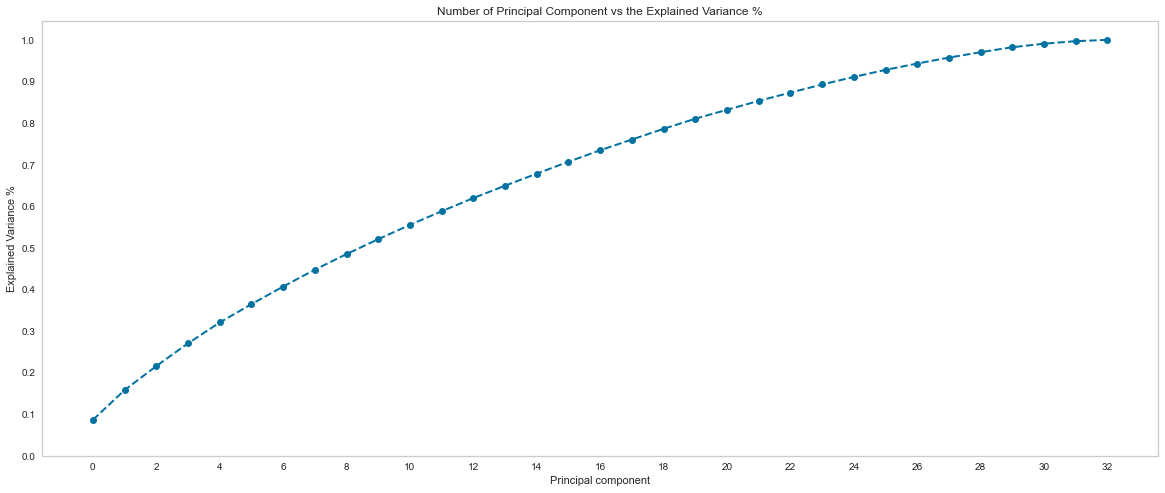

In [24]:
pca = PCA(random_state=42)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

pca.n_components = len(X.columns)
pca_data = pca.fit_transform(X_train)
percentage_var_explained = pca.explained_variance_ratio_;  
cum_var_explained = np.cumsum(percentage_var_explained)  
plt.figure(1,figsize=(20,8))
plt.clf()  
y_range = np.arange(0.00,1.1,0.1)
x_range = np.arange(0,33,2)
plt.plot(cum_var_explained,linewidth=2, marker='o', linestyle='--')  
plt.axis('tight')  
plt.title('Number of Principal Component vs the Explained Variance %')
plt.xlabel('Principal component') 
plt.ylabel('Explained Variance %') 
plt.yticks(y_range)
plt.xticks(x_range)
plt.grid()
plt.show()

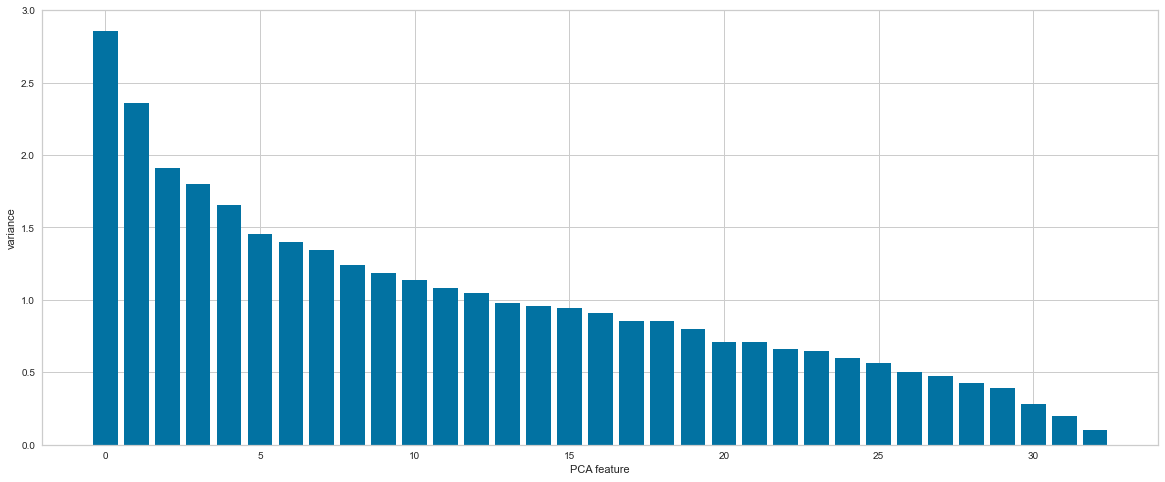

In [25]:
plt.rcParams["figure.figsize"] = (20,8)
plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.show()

**Question 4 (1 pt):** Approximately how many components of the dataset are needed to explain 81% of the variation in the model?

> a) 10\
> b) 15\
> c) 20\
> d) 25 

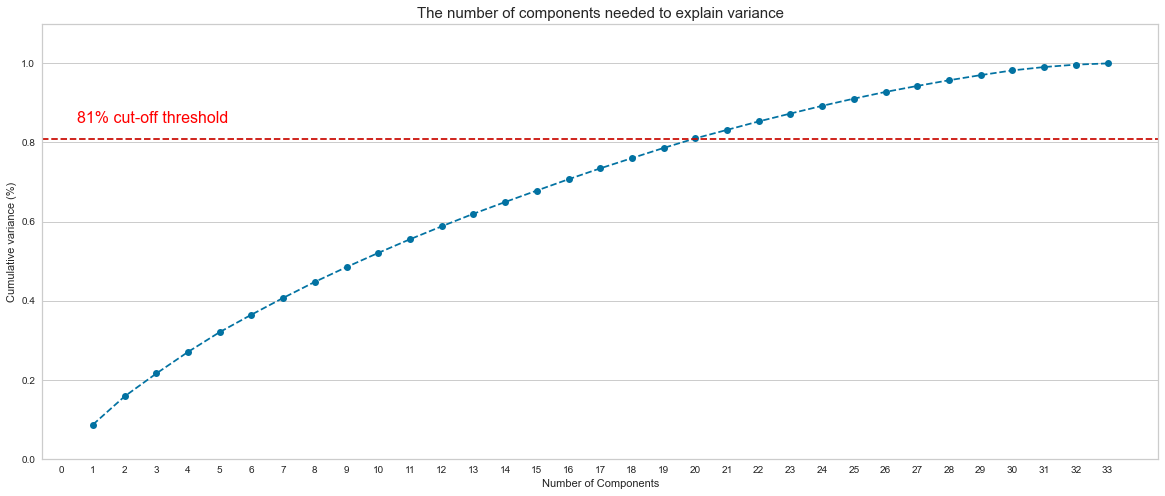

In [26]:
plt.rcParams["figure.figsize"] = (20,8)
fig, ax = plt.subplots()
xi = np.arange(1, 34, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 34, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance', fontsize=15)
plt.axhline(y=0.81, color='r', linestyle='--')
plt.text(0.5, 0.85, '81% cut-off threshold', color = 'red', fontsize=16)
ax.grid(axis='x')
plt.show()

In [105]:
# answer: c)

We will now reduce our `X` matrix using PCA.

**Task:** First, create a new `PCA` classes using `n_components` equal to your answer from **Question 4**.  Second, fit the new PCA class to the scaled `X` train data.  Lastly, create a transformed dataset from the `PCA` class.  The following documentation should help you:  https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html.  Also see the Notebook from Lecture 6.

*Note*:  Name the transformed dataset from PCA  `X_train_pca` .

In [27]:
X = pd.read_csv("matrices/X.csv",index_col = 0)
y = pd.read_csv("matrices/y.csv",index_col=0,squeeze = True)

In [28]:
X_standard_scaler = StandardScaler()
X_scaled = X_standard_scaler.fit_transform(X)

In [29]:
pca_new = PCA(n_components = 20)
pca_new.fit(X_scaled)
X_pca = pca_new.transform(X_scaled)

In [30]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.4, random_state=42)

**Task:** Inspect the transformed dataset.  How many features does it have it compared to our original dataset?  What is the meaning of each feature?

In [31]:
print (X_train.shape)
print (X_train_pca.shape)

(626, 33)
(626, 20)


**Task:** Train a new Decision Tree Classifier but instead of using the train dataset `X_train`, use the the new transformed train dataset after using PCA.

**IMPORTANT:** Use the parameters `max_depth=2`,`splitter='best'`, and `random_state=42` just as you did earlier in this notebook.

In [32]:
clf_pca = DecisionTreeClassifier(max_depth=2, splitter = 'best', random_state = 42)

# Train Decision Tree Classifer
clf_pca = clf_pca.fit(X_train_pca,y_train_pca)

#Predict the response for test dataset
y_pred_pca = clf_pca.predict(X_test_pca)

**Task:** Next, apply the PCA to the test dataset and check the accuracy.

In [33]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test_pca, y_pred_pca))

Accuracy: 0.7942583732057417


**Question 5 (1 pt):** Approximately what is the accuracy of the Decision Tree Classifier trained on the transformed dataset?

> a) `0.75` \
> b) `0.8` \
> c) `0.85` \
> d) `0.9`

In [ ]:
# b) 0.80

**Task:**  Create a plot for the newly trained Decision Tree Classifier.

[Text(558.0, 362.4, 'X[0] <= 0.704\ngini = 0.335\nsamples = 626\nvalue = [493, 133]'),
 Text(279.0, 217.44, 'X[11] <= -1.246\ngini = 0.213\nsamples = 428\nvalue = [376, 52]'),
 Text(139.5, 72.47999999999996, 'gini = 0.493\nsamples = 43\nvalue = [24, 19]'),
 Text(418.5, 72.47999999999996, 'gini = 0.157\nsamples = 385\nvalue = [352, 33]'),
 Text(837.0, 217.44, 'X[11] <= -0.214\ngini = 0.483\nsamples = 198\nvalue = [117, 81]'),
 Text(697.5, 72.47999999999996, 'gini = 0.481\nsamples = 87\nvalue = [35, 52]'),
 Text(976.5, 72.47999999999996, 'gini = 0.386\nsamples = 111\nvalue = [82, 29]')]

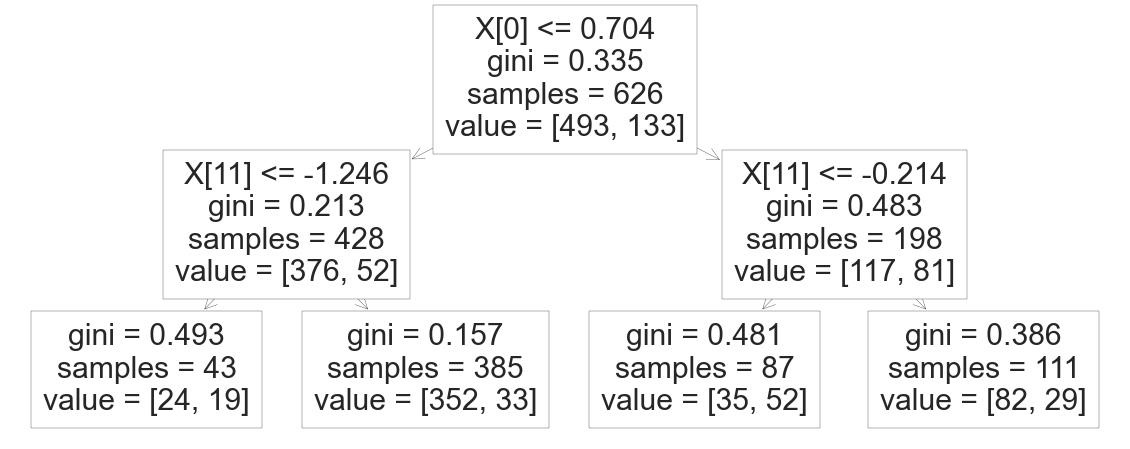

In [36]:
tree.plot_tree(clf_pca)

**Task:** Take a moment to reflect on the value of PCA in this machine learning context.  Was it useful in this circumstance?  If you had to provide a recommendation to other students on when to use (or not use) PCA, what would you tell them?